In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.metrics import accuracy_score

## 1a Linearly separable case:

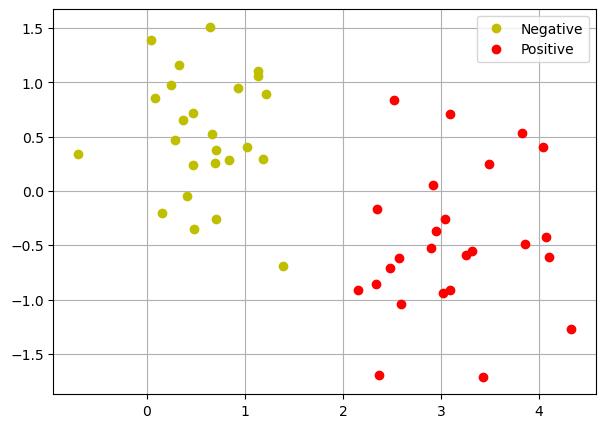

In [4]:
plt.figure(figsize=(7, 5))
n=50
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(-5, 5), random_state=449, cluster_std=0.6)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo',label='Negative')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro',label='Positive')
plt.grid(True)
plt.legend()
plt.show()
y = y*2-1
y = y.reshape(n,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4,random_state=556)

In [5]:
class Perceptron(object):
  def __init__(self, X_train, Y_train, lr, epochs=100, epsilon=1e-5):
    self.n, _ = X_train.shape
    self.X_train = np.c_[np.ones(self.n), X_train]
    self.d = self.X_train.shape[1]
    self.W = np.random.random([self.d, 1])  # Weight
    self.epochs, self.lr, self.epsilon = epochs, lr, epsilon
    self.y_true = Y_train

  def predict(self, x):
    z = x.dot(self.W)
    a = 2*(z>0)-1
    return a
  
  def error(self, X_test=None, y_test=None):
    if X_test is None:
      diff = self.y_true-self.predict(self.X_train)
    else:
      diff = y_test-self.predict(X_test)
    return (diff.T@diff)[0,0]
    
  def batch_fit(self, verbose=False, plot=False):
    error_list = []
    for epoch in range(self.epochs):
      y_pred = self.predict(self.X_train)
      if np.any([np.squeeze(y_pred) != np.squeeze(self.y_true)]):
        update = np.sum(self.y_true[np.squeeze(y_pred) != np.squeeze(self.y_true)]
                        *self.X_train[np.squeeze(y_pred) != np.squeeze(self.y_true)], axis=0).reshape([self.d,1])
        self.W += self.lr * update
        err = self.error()
        error_list.append(err)
      else:
        break
      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)
    return self.W, error_list, epoch+1

  def seq_fit(self, verbose=False, plot=False):
    error_list = []
    Weight_array=[]
    for epoch in range(self.epochs):
      if np.all([np.squeeze(self.predict(self.X_train))==np.squeeze(self.y_true)]):
        break
      for i in range(self.n):
        y_pred = self.predict(self.X_train[i])
        if y_pred != self.y_true[i]:
          self.W = self.W + self.lr*(self.y_true[i]*self.X_train[i].reshape([self.d,1]))
          Weight_array.append(self.W)
      err = self.error()
      error_list.append(self.error())
      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)
    return Weight_array,self.W, error_list, epoch+1

  def plot(self, a, b, bias, epoch):
    y = self.y_true.reshape(len(self.y_true),)
    plt.plot(self.X_train[:, 1][y == -1], self.X_train[:, 2][y == -1], 'yo')
    plt.plot(self.X_train[:, 1][y ==  1], self.X_train[:, 2][y ==  1], 'ro')
    xx = np.linspace(-10,10,5000)
    yy = (a*xx + bias)/(-1*b)
    plt.plot(xx, yy,'b')
    plt.title("epoch "+str(epoch))
    plt.xlim(np.min(self.X_train[:, 1])-1, np.max(self.X_train[:, 1])+1)
    plt.ylim(np.min(self.X_train[:, 2])-1, np.max(self.X_train[:, 2])+1)
    plt.grid(True)
    plt.show()


### (2) Batch Perceptron training algorithm

Error at epoch 0: 56
epochs 0: the weight:[[0.39039411]
 [0.05493283]
 [0.48269416]] 



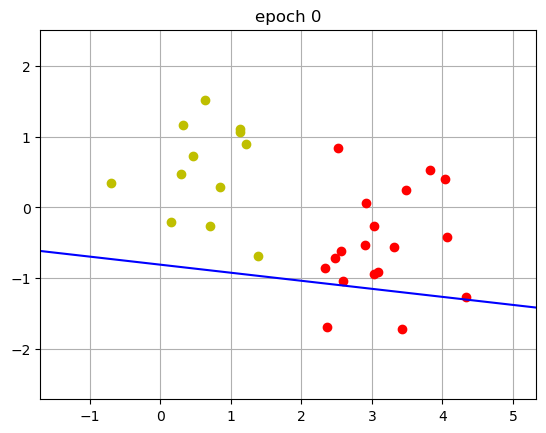

Error at epoch 1: 76
epochs 1: the weight:[[0.19039411]
 [0.01870643]
 [0.28652382]] 



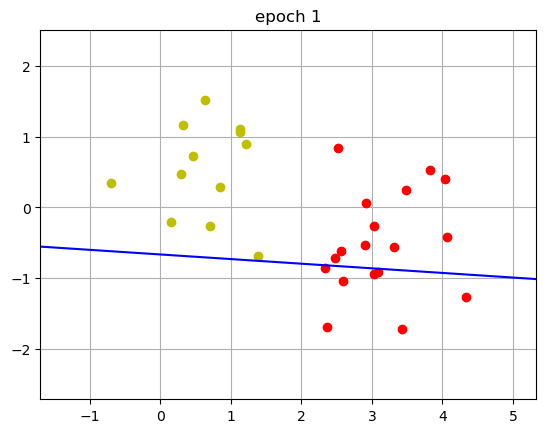

Error at epoch 2: 44
epochs 2: the weight:[[ 0.09039411]
 [ 0.29009442]
 [-0.01014841]] 



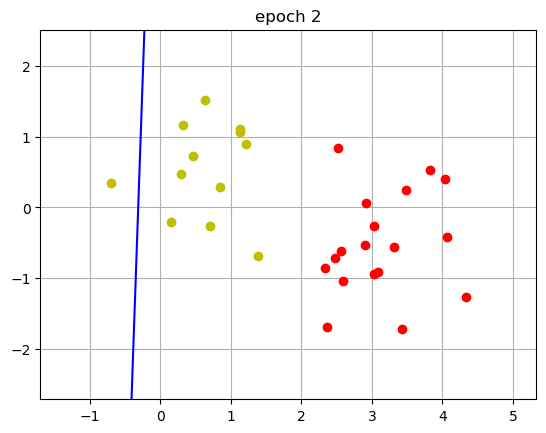

Error at epoch 3: 4
epochs 3: the weight:[[-0.12960589]
 [ 0.12388779]
 [-0.13131948]] 



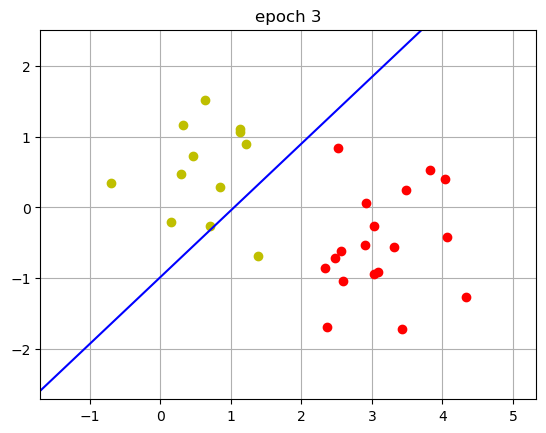

Error at epoch 4: 8
epochs 4: the weight:[[-0.14960589]
 [ 0.09606424]
 [-0.11754128]] 



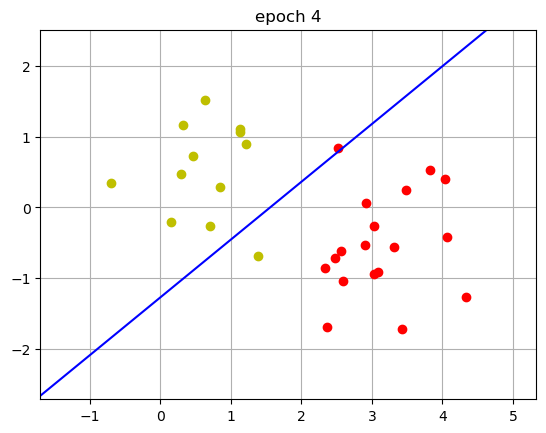

Error at epoch 5: 4
epochs 5: the weight:[[-0.14960589]
 [ 0.11864621]
 [-0.08699572]] 



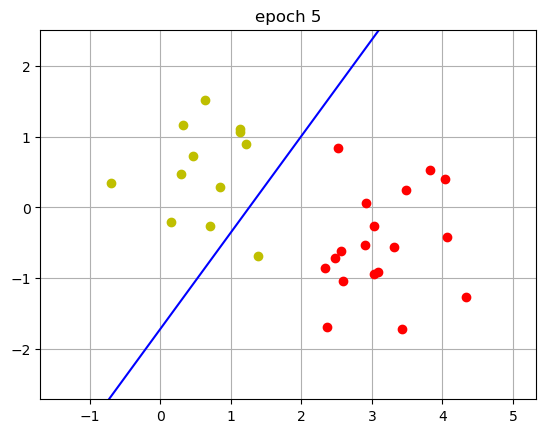

Error at epoch 6: 8
epochs 6: the weight:[[-0.16960589]
 [ 0.09082266]
 [-0.07321752]] 



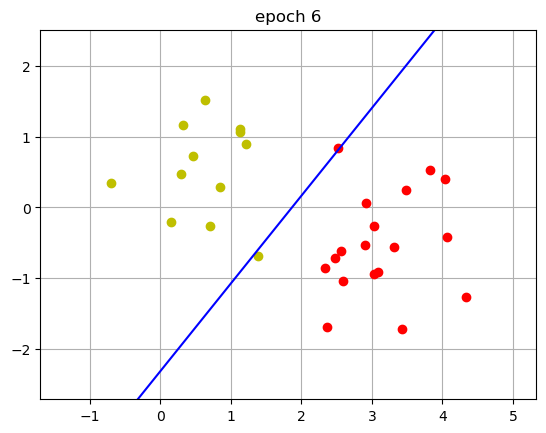

Error at epoch 7: 4
epochs 7: the weight:[[-0.16960589]
 [ 0.11340463]
 [-0.04267196]] 



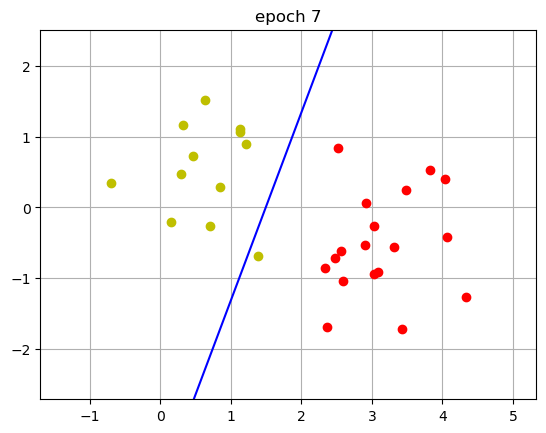

Error at epoch 8: 0
epochs 8: the weight:[[-0.18960589]
 [ 0.08558108]
 [-0.02889376]] 



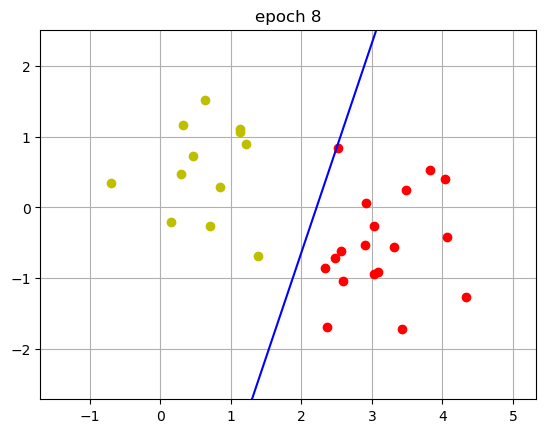

In [6]:
Y_train_batch = Y_train
X_train_batch = X_train
perceptron = Perceptron(X_train_batch, Y_train_batch, epochs=50,lr = 0.02)
w, batch_err, converge_iter = perceptron.batch_fit(plot = True, verbose=True)

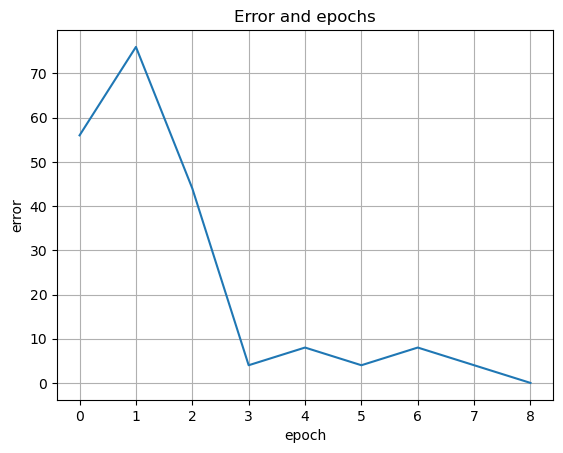

In [7]:
plt.plot(batch_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.title("Error and epochs")
plt.grid(True)
plt.show()

### (3) Use the test data set

epochs 0: the weight:[[0.04984832]
 [0.76448925]
 [0.79088946]] 



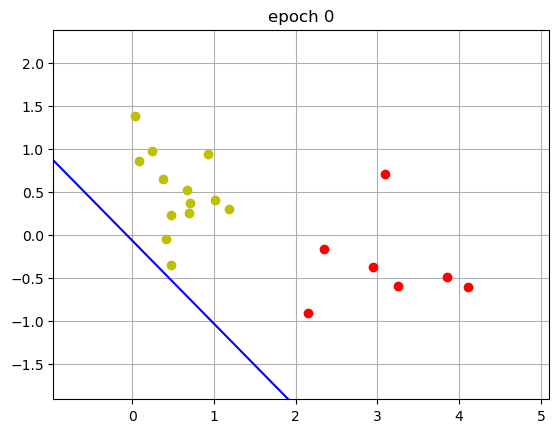

epochs 1: the weight:[[-0.21015168]
 [ 0.61846933]
 [ 0.66054084]] 



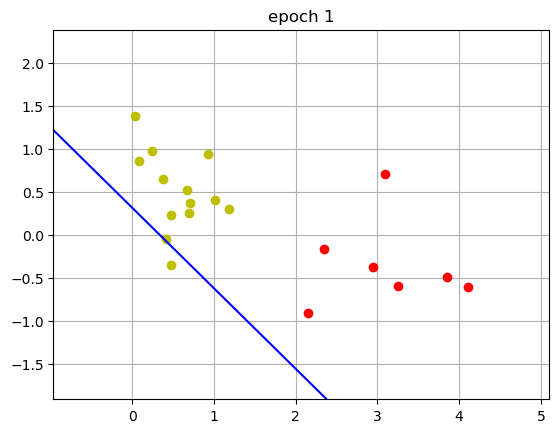

epochs 2: the weight:[[-0.45015168]
 [ 0.48206797]
 [ 0.52310693]] 



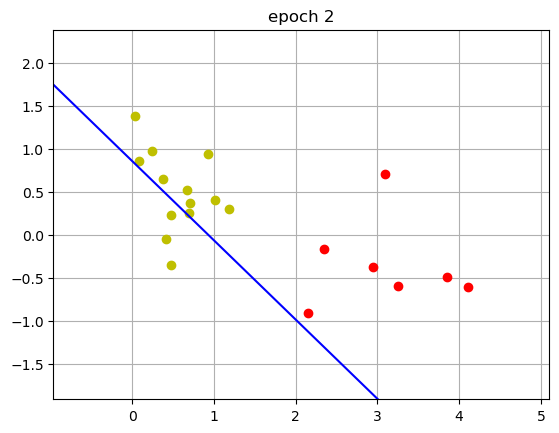

epochs 3: the weight:[[-0.65015168]
 [ 0.36334147]
 [ 0.38939851]] 



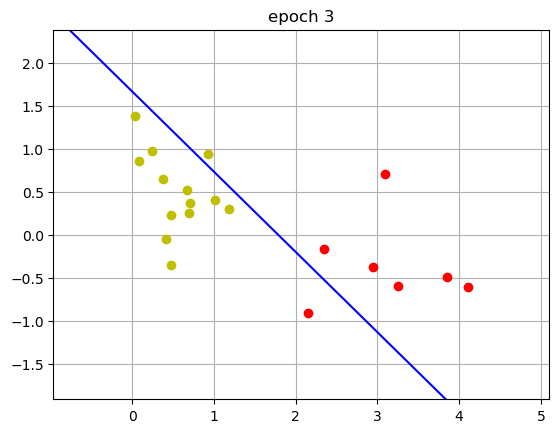

epochs 4: the weight:[[-0.65015168]
 [ 0.38769963]
 [ 0.35226234]] 



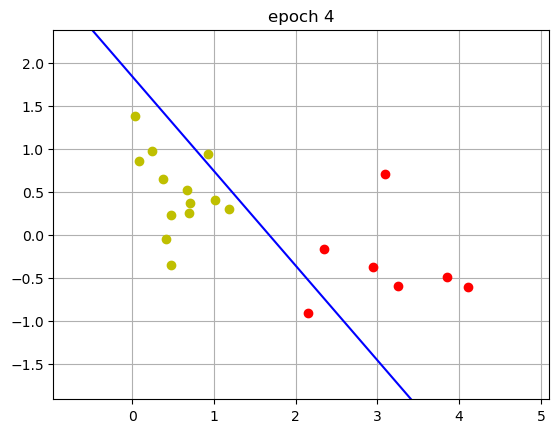

epochs 5: the weight:[[-0.65015168]
 [ 0.41205779]
 [ 0.31512618]] 



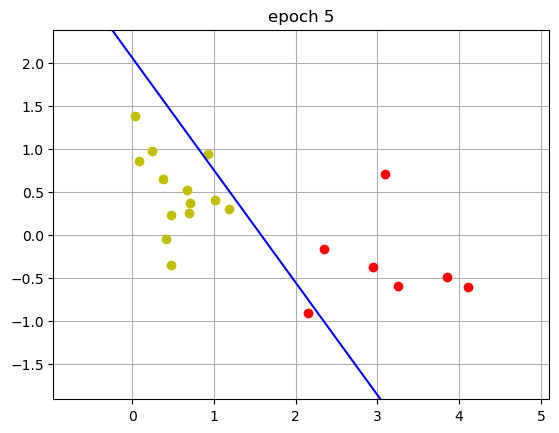

epochs 6: the weight:[[-0.65015168]
 [ 0.43641594]
 [ 0.27799001]] 



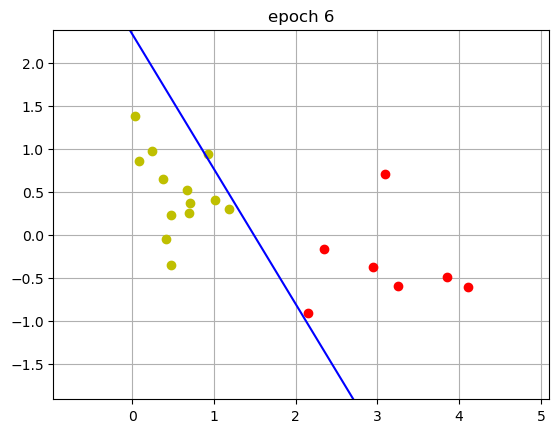

epochs 7: the weight:[[-0.67015168]
 [ 0.41779101]
 [ 0.2590534 ]] 



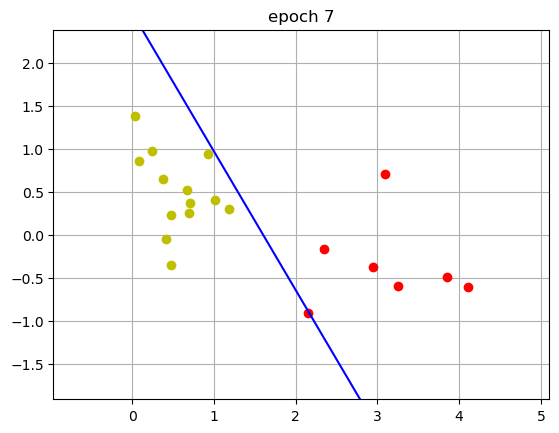

epochs 8: the weight:[[-0.65015168]
 [ 0.4607741 ]
 [ 0.24085385]] 



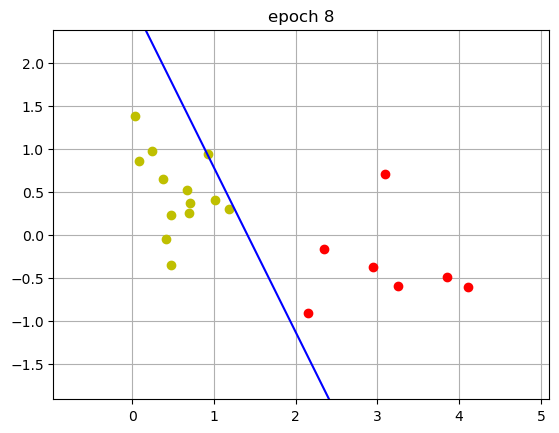

epochs 9: the weight:[[-0.67015168]
 [ 0.44214917]
 [ 0.22191723]] 



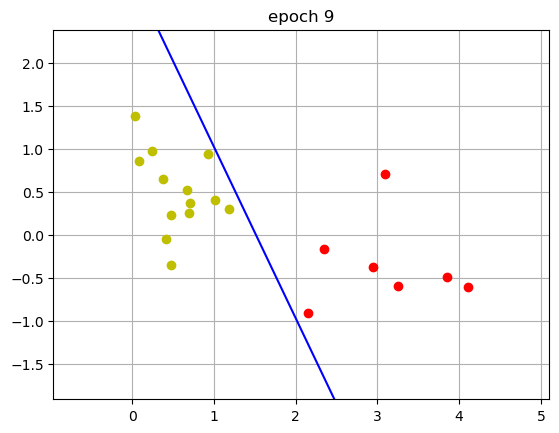

In [8]:
Y_test_batch = Y_test
X_test_batch = X_test
perceptron = Perceptron(X_test_batch, Y_test_batch,epochs=50,lr = 0.02)
w, batch_err, converge_iter = perceptron.batch_fit(plot = True, verbose=False)

In [9]:
ACC_batch=np.c_[np.ones(X_test.shape[0]), X_test]
y_pred = []
for i in range(len(ACC_batch)):
    y_pred.append(perceptron.predict(ACC_batch[i]))
acc1 = accuracy_score(Y_test, y_pred)
print('Accuracy Rate: ',acc1)
print('Error Rate:',1-acc1)

Accuracy Rate:  1.0
Error Rate: 0.0


### Accuracy Rate:  1.0 Error:  0.0

### (4) Sequential Perceptron training algorithm 

epochs 0: the weight:[[-0.04701424]
 [ 0.48484476]
 [ 0.11858844]] 



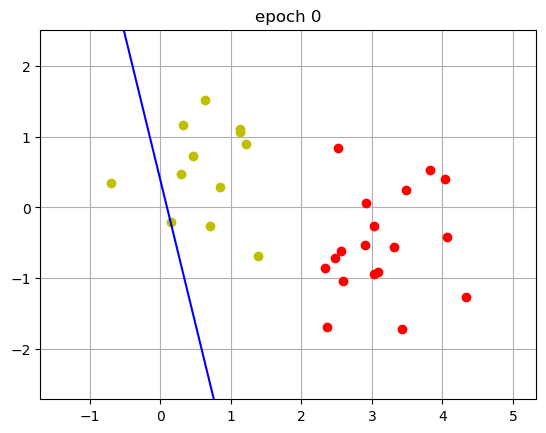

epochs 1: the weight:[[-0.15701424]
 [ 0.40174145]
 [ 0.05800291]] 



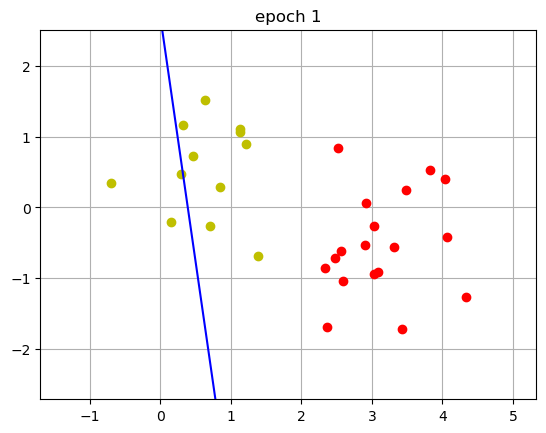

epochs 2: the weight:[[-0.22701424]
 [ 0.33114275]
 [ 0.01892415]] 



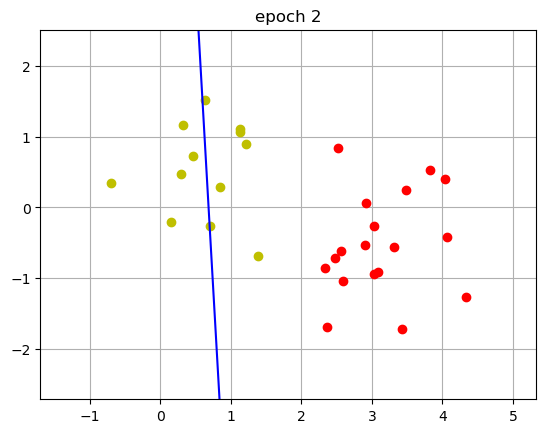

epochs 3: the weight:[[-0.29701424]
 [ 0.26054406]
 [-0.02015461]] 



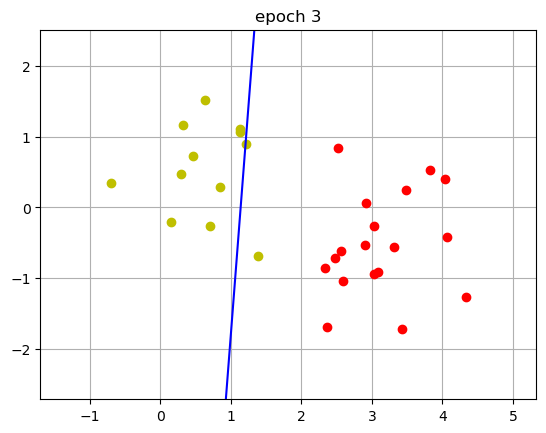

epochs 4: the weight:[[-0.30701424]
 [ 0.24663228]
 [-0.01326551]] 



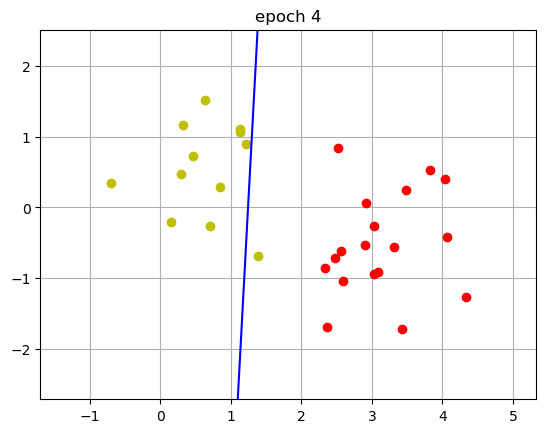

epochs 5: the weight:[[-0.31701424]
 [ 0.23272051]
 [-0.00637641]] 



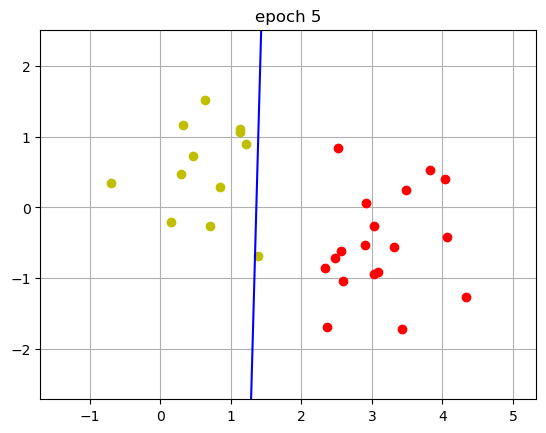

epochs 6: the weight:[[-0.32701424]
 [ 0.21880873]
 [ 0.00051268]] 



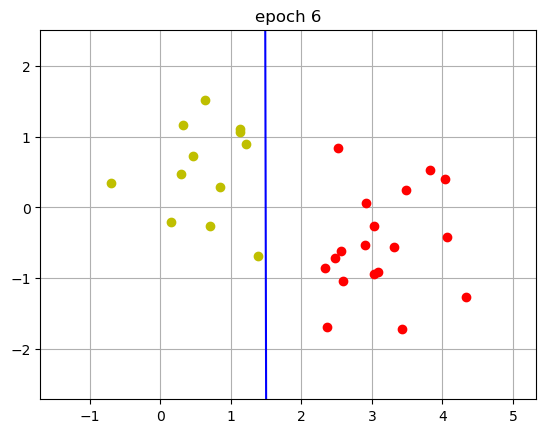

In [10]:
Y_train_seq = Y_train
X_train_seq = X_train
perceptron = Perceptron(X_train_seq, Y_train_seq, epochs=50, lr=0.01)
Weight_array,w,seq_err,_ = perceptron.seq_fit(verbose = False, plot=True)

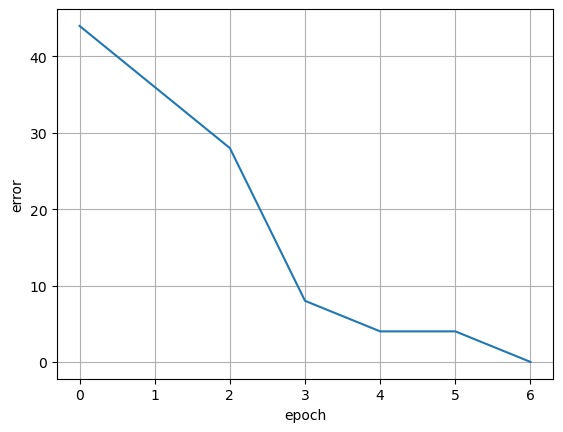

In [12]:
plt.plot(seq_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.show()

### (5) Use test data set

epochs 0: the weight:[[0.4047377 ]
 [0.62869788]
 [0.38419392]] 



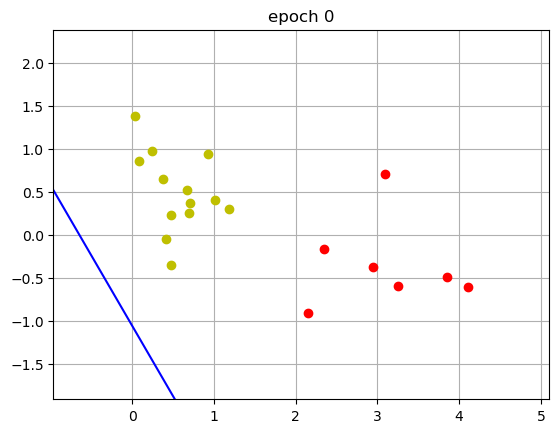

epochs 1: the weight:[[0.2747377 ]
 [0.55568792]
 [0.31901961]] 



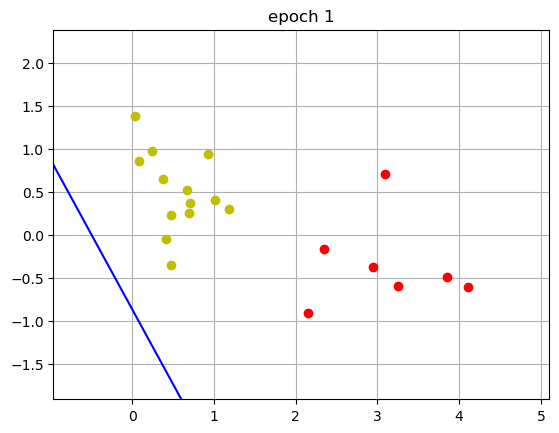

epochs 2: the weight:[[0.1447377 ]
 [0.48267796]
 [0.25384529]] 



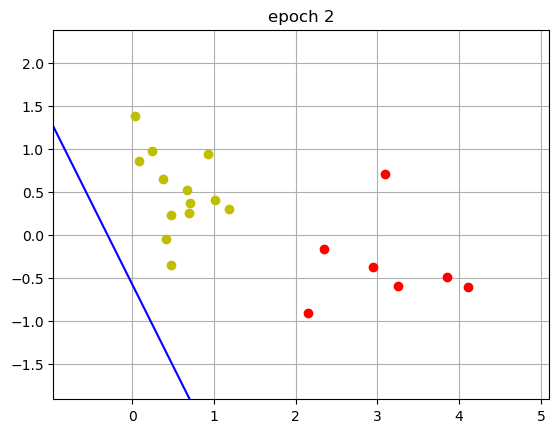

epochs 3: the weight:[[0.0147377 ]
 [0.40966801]
 [0.18867098]] 



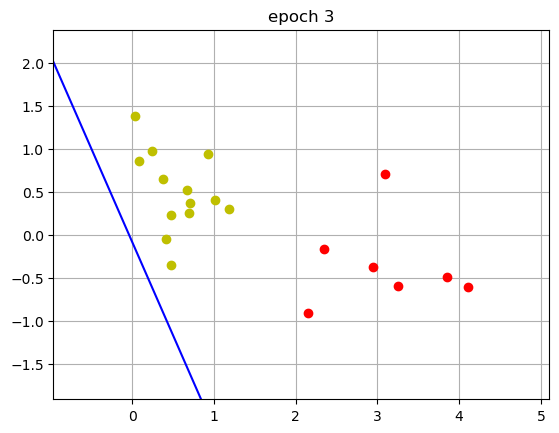

epochs 4: the weight:[[-0.1152623 ]
 [ 0.33665805]
 [ 0.12349667]] 



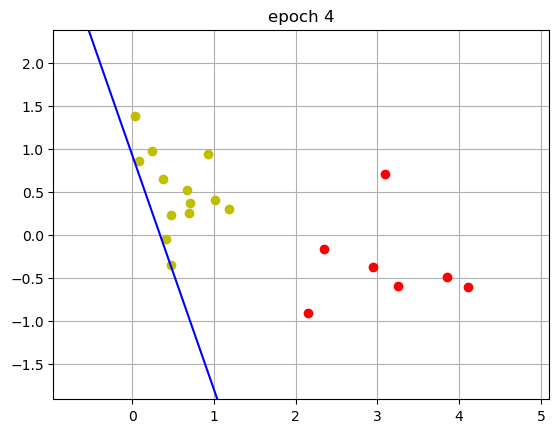

epochs 5: the weight:[[-0.1952623 ]
 [ 0.27626984]
 [ 0.08652635]] 



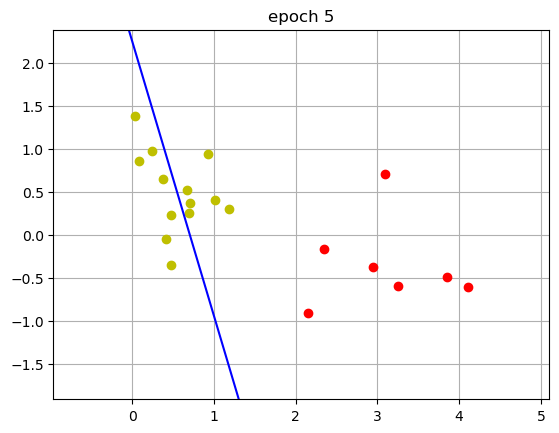

epochs 6: the weight:[[-0.2352623 ]
 [ 0.23803737]
 [ 0.06746705]] 



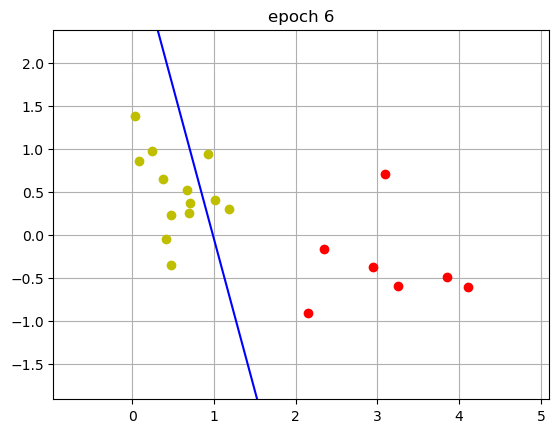

epochs 7: the weight:[[-0.2652623 ]
 [ 0.2067189 ]
 [ 0.05097693]] 



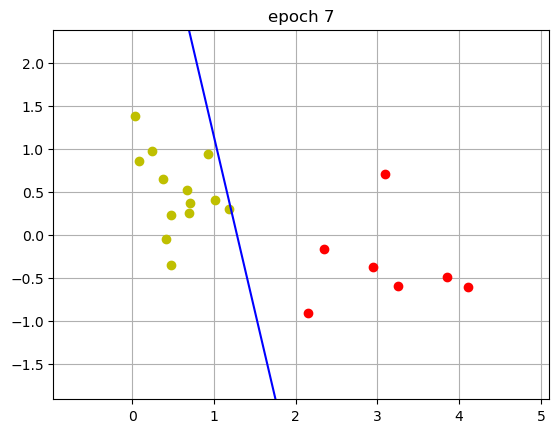

In [13]:
Y_test_seq = Y_test
X_test_seq = X_test
perceptron = Perceptron(X_test_seq, Y_test_seq, epochs=50, lr=0.01)
Weight,w,seq_err,_ = perceptron.seq_fit(verbose = False, plot=True)

In [14]:
y_pred = []
ACC_seq = np.c_[np.ones(X_test.shape[0]), X_test]
for i in range(len(ACC_seq)):
 y_pred.append(perceptron.predict(ACC_seq[i]))
acc2 = accuracy_score(Y_test, y_pred)
print('Accuracy Rate: ',acc2)
print('Error: ',1-acc2)

Accuracy Rate:  1.0
Error:  0.0


### Accuracy Rate:  1.0 ，Error:  0.0

### (6)

Text(0.5, 1.0, 'learning rate and Iterations')

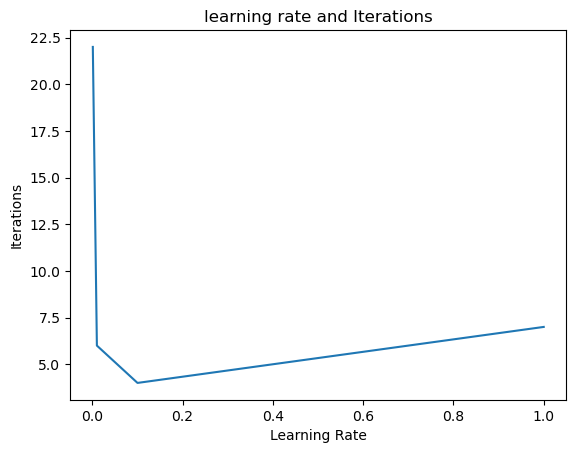

In [108]:
learning_rate=[0.001,0.01,0.1,1]
iter_list=[]
for i in learning_rate:
    perceptron = Perceptron(X_train_batch, Y_train_batch, epochs=50,lr = 0.02)
    w, batch_err, converge_iter = perceptron.batch_fit(plot = False, verbose=False)
    iter_list.append(converge_iter)

plt.plot(learning_rate,iter_list)
plt.xlabel('Learning Rate')
plt.ylabel('Iterations')
plt.title("learning rate and Iterations")

## 1b (Non linearly separable data set)

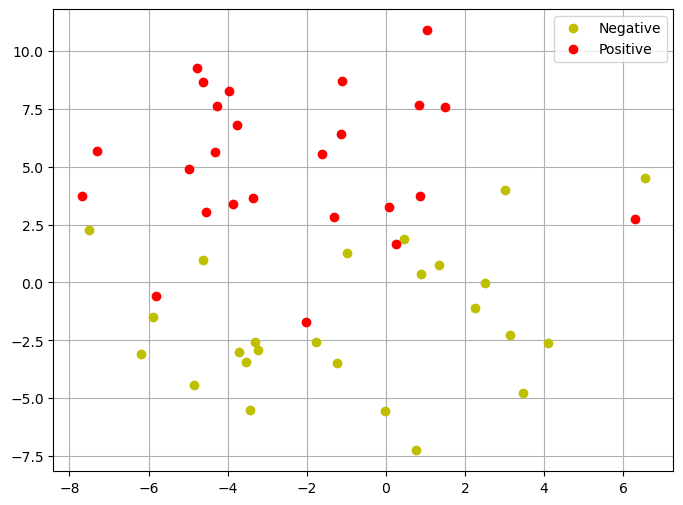

In [73]:
plt.figure(figsize=(8, 6))
n=50
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(-5, 5), random_state=348, cluster_std=3.5)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo',label='Negative')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro',label='Positive')
plt.grid(True)
plt.legend()
plt.show()

In [74]:
y = y*2-1
y = y.reshape(n,1)
perceptron = Perceptron(X, y, epochs=100,lr = 0.01)
Weight_array,w, err, converge_iter = perceptron.seq_fit(plot=False)

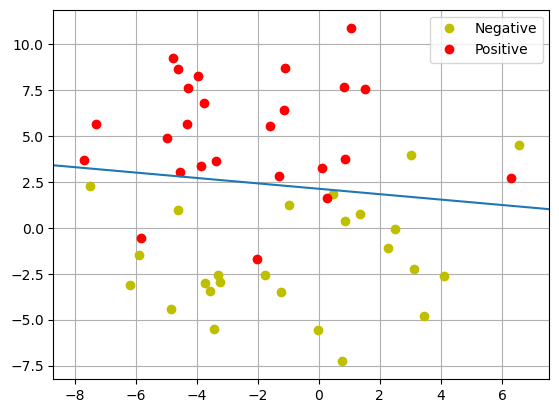

In [77]:
y_1 = y.reshape(len(y),)
plt.plot(X[:, 0][y_1 == -1], X[:, 1][y_1 == -1], 'yo',label='Negative')
plt.plot(X[:, 0][y_1 == 1], X[:, 1][y_1 == 1], 'ro',label='Positive')
plt.grid(True)
plt.legend()
xx = np.linspace(-10,10)
yy = (w[1][0]*xx + w[0][0])/(-1*w[2][0])

plt.plot(xx, yy)
plt.xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
plt.ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
plt.show()

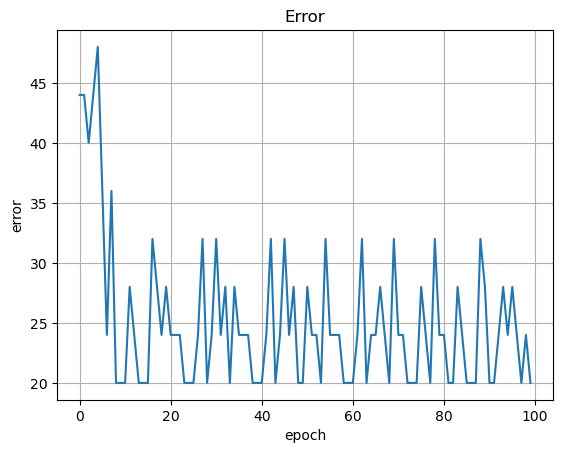

In [81]:
plt.plot(err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.title("Error")
plt.show()